# Practica de NLP - Santiago Cisneros
Analisis del codigo de un dataset de productos de Amazon: Caso Home & Kitchen

Para empezar, procedo a montar el drive para cargar el Dataset de Home & Kitchen, verifico haberlo agregado desde el Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
!pwd

/content


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
WORKING_PATH = '/content/drive/MyDrive/KEEPCODIN/NLP'

In [7]:
%cd {WORKING_PATH}

/content/drive/MyDrive/KEEPCODIN/NLP


In [8]:
import sys
sys.path.append(WORKING_PATH)

In [9]:
import pandas as pd
import json

In [10]:
# Ruta del archivo en Google Drive
df = pd.read_json('/content/drive/MyDrive/KEEPCODIN/NLP/Home_and_Kitchen_5.json', lines=True, encoding_errors='ignore')
print(df.head())
print("Tamaño del Dataset :" , df.shape)

       reviewerID        asin            reviewerName   helpful  \
0   APYOBQE6M18AA  0615391206         Martin Schwartz    [0, 0]   
1  A1JVQTAGHYOL7F  0615391206           Michelle Dinh    [0, 0]   
2  A3UPYGJKZ0XTU4  0615391206            mirasreviews  [26, 27]   
3  A2MHCTX43MIMDZ  0615391206  M. Johnson "Tea Lover"  [14, 18]   
4   AHAI85T5C2DH3  0615391206                PugLover    [0, 0]   

                                          reviewText  overall  \
0  My daughter wanted this book and the price on ...        5   
1  I bought this zoku quick pop for my daughterr ...        5   
2  There is no shortage of pop recipes available ...        4   
3  This book is a must have if you get a Zoku (wh...        5   
4  This cookbook is great.  I have really enjoyed...        4   

                                             summary  unixReviewTime  \
0                                         Best Price      1382140800   
1                                               zoku      1403

# Analisis Exploratorio

Observando el dataset, tenemos un dataset de 500000 filas con 9 columnas, en donde el UnixReviewTime representa los valores en codigo unix del tiempo cuando se realizo la reseña sobre el producto, asi mismo el summary viene a ser un resumen breve de la reseña escrita por el usuario (cliente) de Amazon, la calificación, y el helpful representan valores de interés para otros clientes

A partir de esto, se debe observar cuantos productos existen en el dataset, diferenciando, con el código ASIN de Amazon.

Además, es necesario analizar las escalas utilizadas en las columnas overall y helpful para poder cuantificar y entender mejor la distribución de los datos. Esto permitirá identificar patrones o tendencias en los comentarios.

In [ ]:
# Obtener los valores únicos de la columna 'columna_nombre'
valores_unicos = df['asin'].unique()
conteo_valores_unicos = df['asin'].value_counts()

# Mostrar tamaño de valores únicos
print(valores_unicos.shape)
print(conteo_valores_unicos)

(28237,)
asin
B00006JSUA    1064
B001N07KUE     921
B00006IUWA     662
B00005B8K5     656
B000QFDNP8     634
              ... 
B00JONB6Z2       5
B0000CFQBK       5
B007N954ES       5
B001LQWHO4       5
B001LJW5YI       5
Name: count, Length: 28237, dtype: int64


In [ ]:
# Ver las escalas en la columna "overall"
print("Escalas en 'overall':")
print(df["overall"].value_counts().sort_index())

# Ver las escalas en la columna "helpful" (formato [x, y])
print("\nEjemplo de valores en 'helpful':")
print(df["helpful"].head(10))

Escalas en 'overall':
overall
1     27106
2     24313
3     45059
4    105508
5    349696
Name: count, dtype: int64

Ejemplo de valores en 'helpful':
0      [0, 0]
1      [0, 0]
2    [26, 27]
3    [14, 18]
4      [0, 0]
5      [0, 0]
6      [2, 3]
7    [32, 39]
8    [13, 13]
9      [0, 0]
Name: helpful, dtype: object


Como la escala utilizada en helpfull representa una métrica basada en votos, se debe analizar la utilidad de la reseña.

En este caso, se asumirá que a partir de 3 estrellas será una reseña positiva, ya que el cliente se encuentra ligeramente satisfecho con el producto, aunque no es lo que estaba buscando o no resultó como el pensaba.
E inferior a 3 viene a ser una reseña negativa.

In [ ]:
def contar_reseñas(df, columna_puntuacion):

    # Contar reseñas positivas y negativas
    positivas = df[df[columna_puntuacion] >= 3].shape[0]
    negativas = df[df[columna_puntuacion] < 3].shape[0]

    # Devolver el resultado en un diccionario
    return {'Positivas': positivas, 'Negativas': negativas}


# Contar reseñas positivas y negativas
conteo = contar_reseñas(df, columna_puntuacion = 'overall')

# Mostrar el resultado
print("Reseñas positivas:", conteo['Positivas'])
print("Reseñas negativas:", conteo['Negativas'])

Reseñas positivas: 500263
Reseñas negativas: 51419


In [ ]:
# Función para calcular la utilidad
def calcular_utilidad(helpful):
    votos_utiles, total_votos = helpful
    return votos_utiles / total_votos if total_votos > 0 else 0

# Agrego la columna de utilidad al DataFrame
df['utilidad'] = df['helpful'].apply(calcular_utilidad).round(5)

# Mostrar el DataFrame con la nueva columna
print(df)

            reviewerID        asin            reviewerName   helpful  \
0        APYOBQE6M18AA  0615391206         Martin Schwartz    [0, 0]   
1       A1JVQTAGHYOL7F  0615391206           Michelle Dinh    [0, 0]   
2       A3UPYGJKZ0XTU4  0615391206            mirasreviews  [26, 27]   
3       A2MHCTX43MIMDZ  0615391206  M. Johnson "Tea Lover"  [14, 18]   
4        AHAI85T5C2DH3  0615391206                PugLover    [0, 0]   
...                ...         ...                     ...       ...   
551677  A11J1FHCK5U06J  B00LBFUU12            Karinna Ball    [0, 0]   
551678   A537XC69FAD3J  B00LBFUU12                 L Green    [0, 0]   
551679   AWHZOUIQ0VO7M  B00LBFUU12               Richard N    [0, 0]   
551680  A1KQNP8MOJDJKC  B00LBFUU12                      RS    [1, 1]   
551681  A3AHOSISKNBLZ6  B00LBFUU12                 Tonya S    [0, 0]   

                                               reviewText  overall  \
0       My daughter wanted this book and the price on ...        

Se deben verificar posibles sesgos en la base de datos. Para lograrlo, es crucial analizar la autenticidad de las reseñas y asegurarnos de que no existan comentarios falsos. Una forma de hacerlo es con la cantidad de reseñas escritas por un usuario, lo que permite evaluar la calidad y confiabilidad de los datos.

In [ ]:
# Contar el número de reseñas por cada usuario
conteo_reseñas = df['reviewerName'].value_counts()

# Obtener los 100 primeros usuarios con más reseñas
top_usuarios = conteo_reseñas.head(150)

# Mostrar los resultados
print(top_usuarios)


reviewerName
Amazon Customer     7136
Kindle Customer      419
Chris                417
Scott                309
John                 289
                    ... 
Beverly E.           101
JR                   101
Charlemange          100
Dianaru              100
Timothy B. Riley     100
Name: count, Length: 150, dtype: int64


In [ ]:
# Obtener el conteo de cada 'reviewerID'
conteo_reviewers = df['reviewerID'].value_counts().reset_index()

# Renombrar columnas para mayor claridad
conteo_reviewers.columns = ['reviewerID', 'conteo']

# Mostrar la tabla con los conteos
print(conteo_reviewers)

           reviewerID  conteo
0      A1IU7S4HCK1XK0     277
1      A25C2M3QF9G7OQ     227
2      A2ZY49IDE6TY5I     216
3      A2NYK9KWFMJV4Y     184
4      A1W415JP5WEAJK     177
...               ...     ...
66514   AJA9YCGLCSDGU       5
66515   ARGYYW0XA7C4C       5
66516   AFK5B6WLCS2JE       5
66517  A1HLCNW7GDZJR3       5
66518  A1LNDL5KSDAGG5       5

[66519 rows x 2 columns]


In [ ]:
# Filtrar el DataFrame por el reviewerID específico
id_especifico = "A1IU7S4HCK1XK0"
df_filtrado = df[df['reviewerID'] == id_especifico]

# Mostrar todas las filas para ese reviewerID
print(df_filtrado)

            reviewerID        asin    reviewerName   helpful  \
259     A1IU7S4HCK1XK0  B00000JGRP  Joanna Daneman  [19, 19]   
424     A1IU7S4HCK1XK0  B00000JGRT  Joanna Daneman  [10, 10]   
1650    A1IU7S4HCK1XK0  B00004OCIQ  Joanna Daneman    [2, 2]   
2264    A1IU7S4HCK1XK0  B00004OCJQ  Joanna Daneman    [2, 2]   
2460    A1IU7S4HCK1XK0  B00004OCK0  Joanna Daneman  [51, 54]   
...                ...         ...             ...       ...   
545960  A1IU7S4HCK1XK0  B00I3VTW0C  Joanna Daneman    [5, 5]   
546140  A1IU7S4HCK1XK0  B00I8N1JK6  Joanna Daneman    [6, 7]   
549521  A1IU7S4HCK1XK0  B00JPV3MIM  Joanna Daneman    [7, 8]   
549811  A1IU7S4HCK1XK0  B00JS7S5NU  Joanna Daneman    [3, 3]   
551457  A1IU7S4HCK1XK0  B00KSRXUC0             NaN   [9, 11]   

                                               reviewText  overall  \
259     If you mainly use a food processor, or WANT to...        5   
424     I tried this for Dr. Atkins &quot;diet&quot; i...        5   
1650    This is an ea

In [ ]:
conteo_reviewers = df_filtrado['overall'].value_counts().reset_index()
print(conteo_reviewers)

   overall  count
0        5    174
1        4     71
2        3     27
3        2      3
4        1      2


In [ ]:
id_especifico = "A1IU7S4HCK1XK0"
df_filtradouser = df[(df['reviewerID'] == id_especifico) & (df['overall'] < 3)]
print(df_filtradouser)

            reviewerID        asin    reviewerName   helpful  \
11950   A1IU7S4HCK1XK0  B00004S8CS  Joanna Daneman  [19, 19]   
48565   A1IU7S4HCK1XK0  B00008URR8  Joanna Daneman    [1, 1]   
293894  A1IU7S4HCK1XK0  B002451AB2  Joanna Daneman    [1, 1]   
392762  A1IU7S4HCK1XK0  B00451B7TI  Joanna Daneman    [1, 1]   
508308  A1IU7S4HCK1XK0  B009XP92Z2  Joanna Daneman  [11, 12]   

                                               reviewText  overall  \
11950   This pan works just great for stir fries, espe...        1   
48565   I thought, just the thing for my stairs, which...        2   
293894  I just got a basket of strawberries and pulled...        1   
392762  UPDATE: This is still working, but the lower k...        2   
508308  This grill is a variation on many of the elect...        2   

                                                  summary  unixReviewTime  \
11950   I wanted to like this pan, but the nonstick co...      1011484800   
48565                                 No

Al analizar los nombres de los usuarios, observé que algunos de ellos parecen haber escrito reseñas de forma anónima, lo que sugiere que verificar sesgos basados únicamente en los nombres de usuario no es un método válido. Sin embargo, al revisar los identificadores únicos (ID) de cada usuario, se observa que dentro del dataset pueden existir reseñas repetidas, ya que se mencionan productos que los usuarios pueden comprar a cualquier momento del dia que desen degustar el producto.

Entonces, se procede a revisar los n - grams mas frecuentes de las review.

In [ ]:
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Descargar recursos de NLTK (solo la primera vez)
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Función para calcular n-grams más frecuentes
def calcular_ngrams_frecuentes(df, columna_reviews, n=1, top=10):

    # Concatenar todas las reviews en un solo texto
    todas_las_reseñas = ' '.join(df[columna_reviews].astype(str))
    # Tokenizar el texto
    tokens = word_tokenize(todas_las_reseñas)
    # Generar n-grams
    n_grams = list(ngrams(tokens, n))
    # Contar la frecuencia de los n-grams
    frecuencia_ngrams = Counter(n_grams)
    # Convertir a DataFrame para un manejo más cómodo
    df_ngrams = pd.DataFrame(frecuencia_ngrams.most_common(top), columns=[f'{n}-gram', 'Frecuencia'])
    return df_ngrams



# Calcular y mostrar 1-grams, 2-grams y 3-grams
for n in range(1, 4):  # 1-gram, 2-gram, 3-gram
    print(f"\n{n}-grams más frecuentes:")
    ngrams_frecuentes = calcular_ngrams_frecuentes(df, columna_reviews = 'reviewText', n=n, top=10)
    print(ngrams_frecuentes)


1-grams más frecuentes:
   1-gram  Frecuencia
0    (.,)     2817839
1  (the,)     2484395
2    (,,)     1946067
3    (I,)     1779008
4  (and,)     1527182
5   (to,)     1415134
6    (a,)     1411286
7   (it,)     1288134
8   (is,)      890473
9   (of,)      829598

2-grams más frecuentes:
      2-gram  Frecuencia
0     (., I)      652260
1    (., It)      260268
2   (., The)      258539
3   (,, and)      243406
4   (,, but)      213486
5  (of, the)      208376
6  (in, the)      185585
7     (,, I)      163552
8  (I, have)      152909
9  (., This)      148141

3-grams más frecuentes:
          3-gram  Frecuencia
0   (., I, have)       65117
1    (., It, 's)       57465
2     (&, #, 34)       56126
3     (#, 34, ;)       56125
4    (., It, is)       53009
5  (., This, is)       48489
6   (I, do, n't)       44267
7    (,, but, I)       36913
8   (,, but, it)       32251
9    (., I, 've)       30411


Analizando el resultado obtenido se observa que se debe normalizar el corpus para mejorar las respuestas de los n-grams obtenidos, ya que existen combinaciones con los signos de puntuacion, en especial en 1-grams mas frecuente, la mayoria de palabras son stop-words.

## Nube de Palabras

Ahora procedemos a calcular la nube de palabras, en este caso para mejorar la visualizacion sera una nube de palabras general y 2 segmentadas la primera abarca las palabras usadas en las reseñas negativas y la segunda sera con las reseñas positivas.

In [ ]:
# Parte 1: Cargar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
import nltk

# Descargar stop words (solo la primera vez)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

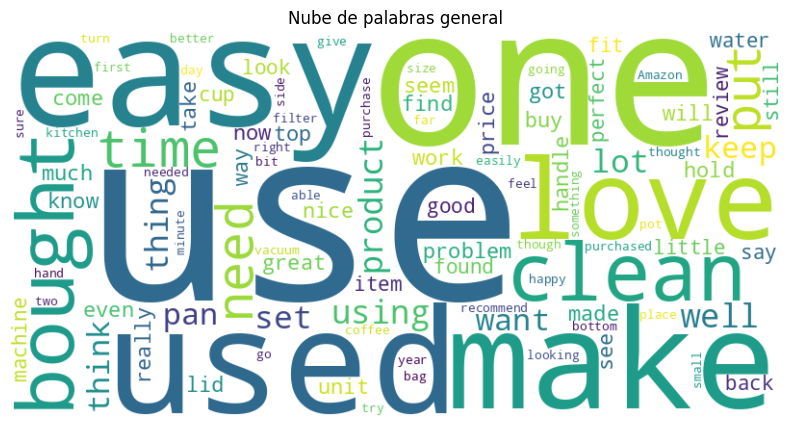

In [ ]:
# Codigo de la Nube de palabras general
def generar_nube_palabras(texto, titulo, stop_words=None):

    nube = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stop_words,
        max_words=100
    ).generate(texto)

    # Mostrar la nube
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()



# Concatenar todas las reseñas en un solo texto
texto_general = ' '.join(df['reviewText'])

# Generar nube general
generar_nube_palabras(texto_general, "Nube de palabras general")

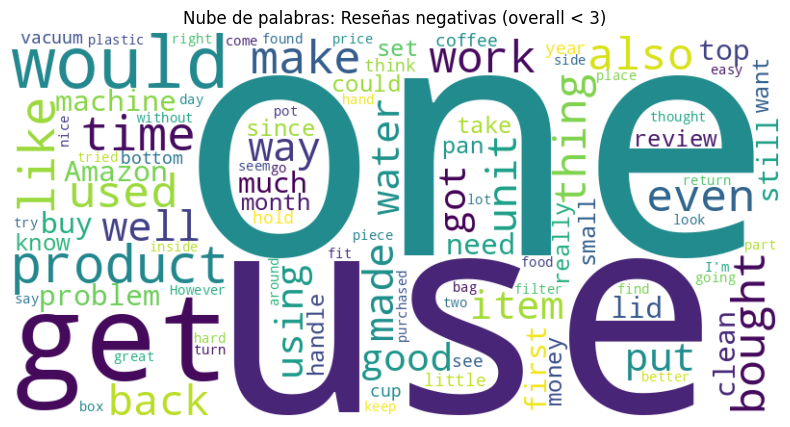

In [ ]:
# Filtrar reseñas con overall menor a 3
texto_negativo = ' '.join(df[df['overall'] < 3]['reviewText'])

# Generar nube de reseñas negativas
generar_nube_palabras(texto_negativo, "Nube de palabras: Reseñas negativas (overall < 3)", stop_words=set(stopwords.words('english')))

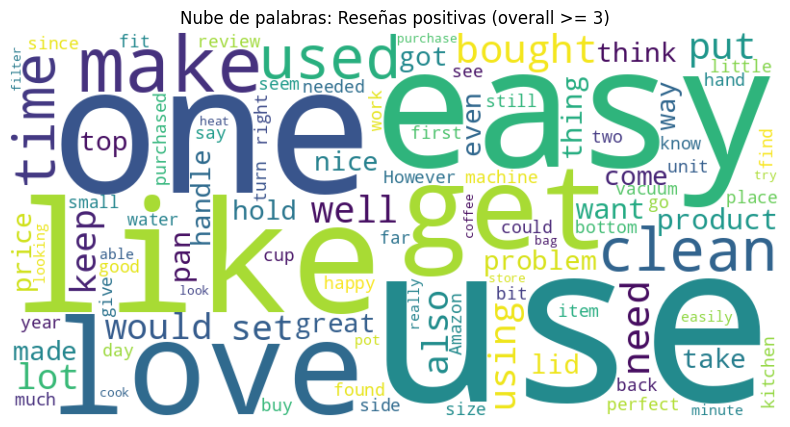

In [ ]:
# Filtrar reseñas con overall mayor o igual a 3
texto_positivo = ' '.join(df[df['overall'] >= 3]['reviewText'])

# Generar nube de reseñas positivas
generar_nube_palabras(texto_positivo, "Nube de palabras: Reseñas positivas (overall >= 3)", stop_words=set(stopwords.words('english')))

Observando las nubes, en la primera nube de palabras (general), se observan términos más genéricos y en su mayoría positivos, lo que sugiere que, en general, las reseñas transmiten un sentimiento favorable hacia el producto, aunque no predomina ninguna sensacion. En cambio, al segmentarla, en la segunda nube (reseñas negativas, overall < 3), predominan palabras que reflejan problemas, insatisfacción y disgusto, como "time", "problem" o "back", indicando una sensacion de insatisfaccion de los clientes. Por el contrario, en la tercera nube (reseñas positivas, overall >= 3), las palabras como "love", "great" y "like" transmiten satisfacción, destacando los aspectos que los clientes valoran y disfrutan del producto. Estas nubes visualizan de manera clara las percepciones de los usuarios.

## Word Embeddings

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

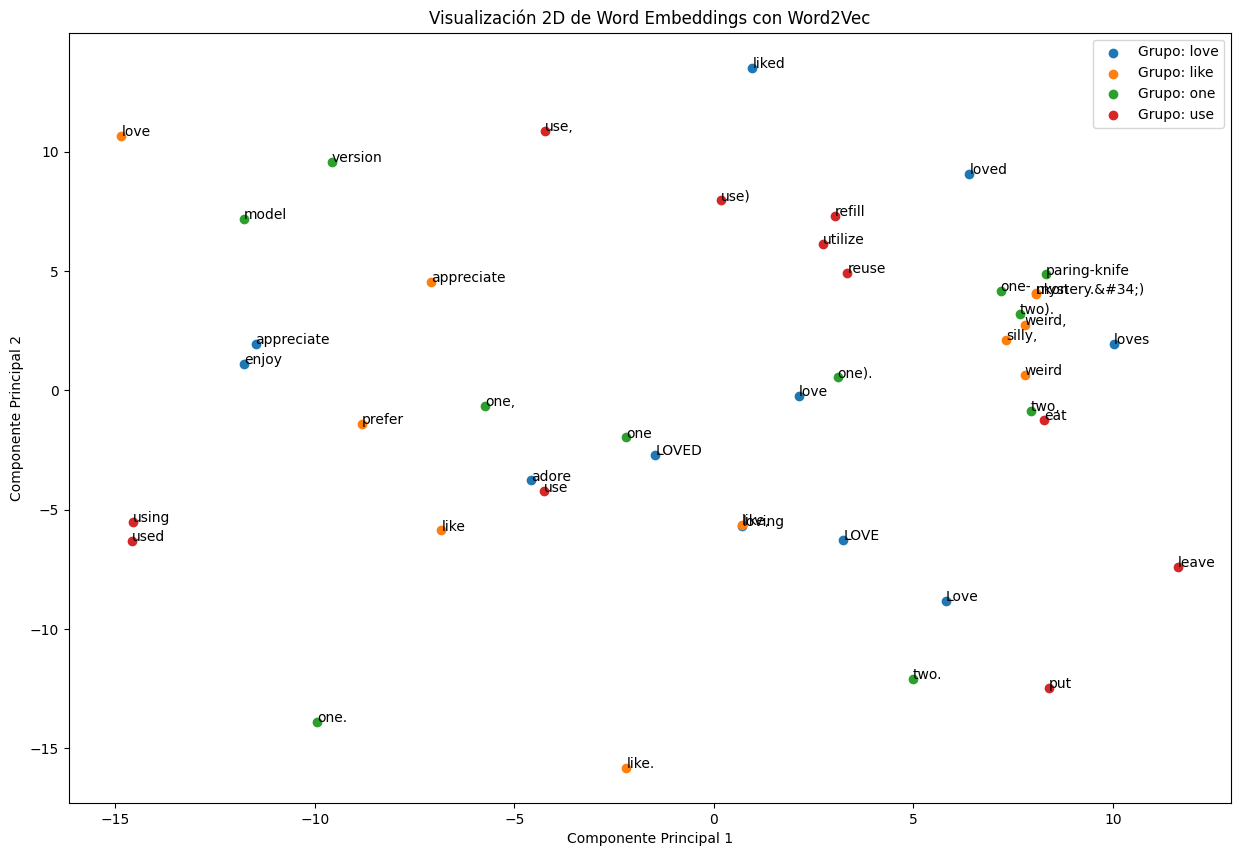

In [ ]:
# Preprocesar el texto: tokenizar las reseñas
corpus = [review.split() for review in df['reviewText']]

# Entrenar el modelo Word2Vec
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

# Parte 3: Elegir palabras clave y obtener sus palabras similares
palabras_clave = ["love", "like", "one", "use"]  # Cambia estas palabras si lo necesitas
top_similares = 10  # Número de palabras similares a visualizar

# Obtener las palabras similares para cada palabra clave
palabras_a_visualizar = {}
for palabra in palabras_clave:
    similares = model.wv.most_similar(palabra, topn=top_similares)
    palabras_a_visualizar[palabra] = [palabra] + [s[0] for s in similares]  # Incluye la palabra clave y sus similares

# Parte 4: Reducir la dimensionalidad de los embeddings a 2D usando PCA
def reducir_a_2d(modelo, palabras):
    # Obtener los embeddings de las palabras
    vectors = [modelo.wv[palabra] for palabra in palabras]
    # Reducir a 2D con PCA
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)
    return vectors_2d

# Crear un gráfico para cada palabra clave y sus similares
plt.figure(figsize=(15, 10))
for i, (palabra, similares) in enumerate(palabras_a_visualizar.items()):
    # Reducir a 2D
    vectors_2d = reducir_a_2d(model, similares)
    # Graficar
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], label=f'Grupo: {palabra}')
    for j, palabra in enumerate(similares):
        plt.annotate(palabra, (vectors_2d[j, 0], vectors_2d[j, 1]))

# Añadir leyenda y título
plt.legend()
plt.title("Visualización 2D de Word Embeddings con Word2Vec")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

La visualización 2D de los word embeddings revela que el modelo captura relaciones semánticas parciales, ya que palabras con significados similares  aparecen cercanas en el plano, lo que sugiere que el algoritmo identifica patrones contextuales básicos. Sin embargo, la dispersión de los puntos y la falta de agrupaciones claras describen una falla que puede ser por el ruido en el texto, la reduccion de dimensionalidad, esto desmuestra que se debe realizar el preprocesamiento y considerar otras tecnicas de visualizacion, sin embargo, si observamos que los embeddings resultan utiles cuando se requiere encontrar relaciones semanticas o analisis de sentimientos dentro del texto.

## Conclusiones

El análisis exploratorio evidenció una distribución desigual en las reseñas, con una predominancia de valoraciones positivas (≥3 estrellas), lo que sugiere la necesidad de buscar un balance antes de entrenar el modelo para evitar sesgos en el mismo. Los n-grams y las nubes de palabras revelaron ciertos patrones entre reseñas positivas y negativas, lo que valida la importancia semántica del corpus para entrenar un modelo de sentimiento. Sin embargo, la cardinalidad del vocabulario y la presencia de ruido (stopwords, puntuación) destacan la importancia de un preprocesamiento riguroso previo al entrenamiento para reducir el espacio de características y mejorar la eficiencia del modelo. Además, la distribución del overall refuerza la necesidad de estratificar los datos durante el entrenamiento, asegurando que el modelo generalice bien en todas las categorías. Estos hallazgos orientan hacia un enfoque técnico que combine limpieza textual, balanceo de clases para optimizar la predicción de sentimiento y utilidad (helpful).


## 2. Preprocesamiento del texto

In [ ]:
!pip install num2words

In [12]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter

import nltk
import unicodedata
import os
import pickle


from num2words import num2words

# Descargar recursos de NLTK (solo la primera vez)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [142]:
# Función de preprocesado mejorada
def preprocesar_texto(texto, eliminar_stopwords=True, lematizar=True, idioma='english'):

    # Convertir a minúsculas, elimininar puntuacion y caracteres especiales
    texto = re.sub(r'[^\w\s]', '', texto.lower())

    # Tokenización
    tokens = word_tokenize(texto, language=idioma)

    # Eliminar stopwords (si está activado)
    if eliminar_stopwords:
        stop_words = set(stopwords.words(idioma))
        tokens = [token for token in tokens if token not in stop_words]

    # Lematización (si está activado)
    if lematizar:
        lematizador = WordNetLemmatizer()
        tokens = [lematizador.lemmatize(token) for token in tokens]

    return tokens

# Entrenar Word2Vec con la columna preprocesada
# model = Word2Vec(sentences=df['reviewText_preprocesado'], vector_size=100, window=5, min_count=1, workers=4)

def sample_stratified(df, target_col, sample_size=15000, random_state=42):

    return df.groupby(target_col, group_keys=False).apply(
        lambda x: x.sample(int(sample_size * len(x) / len(df)), random_state=random_state)
    )


## Codigo para guardar archivo y crear dataset

In [13]:
# Guardar un DataFrame con texto preprocesado en un archivo pkl

ruta_carpeta = "/content/drive/MyDrive/KEEPCODIN/NLP/"
ruta_archivo = os.path.join(ruta_carpeta, "reviewText_preprocesado.pkl")

# Verificar si la carpeta existe, si no, crearla
if not os.path.exists(ruta_carpeta):
    os.makedirs(ruta_carpeta)

# Verificar si el archivo ya existe
if os.path.exists(ruta_archivo):
    # Cargar el archivo .pkl
    with open(ruta_archivo, "rb") as archivo:
        df_sample = pickle.load(archivo)
else:
    # Crear el dataset estratificado por 'overall'
    df_sample = sample_stratified(df, target_col='overall', sample_size=400000)

    # Preprocesar y unir tokens en texto
    df_sample['reviewText_preprocesado'] = df_sample['reviewText'].apply(preprocesar_texto)
    df_sample['reviewText_preprocesado'] = df_sample['reviewText_preprocesado'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

    # Filtrar filas donde el texto preprocesado no esté vacío
    df_sample = df_sample[df_sample['reviewText_preprocesado'].apply(len) > 0]

    # Guardar el DataFrame preprocesado
    with open(ruta_archivo, "wb") as archivo:
        pickle.dump(df_sample, archivo)



# Mostrar resultados
print(df_sample['reviewText_preprocesado'].head())



68894     bought groupon restaurant supply store even gr...
147449    bought cover brought bottom page purchased gri...
184160    inside pot surprised curved bottom inside fini...
349378    382014 update posting review think folk see co...
87782     bought kettle make oatmeal soup noodle etc dis...
Name: reviewText_preprocesado, dtype: object


Ahora realizaremos de nuevo el codigo de las word clouds y los n-grams en este caso para visualizar los resultados despues de un preprocesado

In [14]:
print(df_sample.shape)
df_sample.head()

(399838, 10)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewText_preprocesado
68894,A33LOKJ2AR6L3H,B0000DINC0,"Jesse's granddaughter ""repress""","[0, 0]",I bought this with a Groupon from a restaurant...,1,"Won't fit the counter, rusted",1351641600,"10 31, 2012",bought groupon restaurant supply store even gr...
147449,A2BESOGVKO9IUQ,B000FHGVU6,Amazon Junkie,"[0, 0]",I bought this cover because it was brought up ...,1,Thinnest Plastic Ever,1321228800,"11 14, 2011",bought cover brought bottom page purchased gri...
184160,A3SJFCGN99S7O2,B000N4WMUE,JaneAustenFan73,"[4, 7]",The inside of this pot surprised me. It was c...,1,Not the quality I expected,1395705600,"03 25, 2014",inside pot surprised curved bottom inside fini...
349378,A1533UHM87FNCQ,B0038KPRG6,"Felicia ""ohai!""","[5, 6]","3/8/2014 - Update -After posting this review, ...",1,Terrible food chopper,1391040000,"01 30, 2014",382014 update posting review think folk see co...
87782,A2IB0N6QFLYI98,B00023XCWS,Rye Bread,"[2, 3]","I bought this kettle to make oatmeal, soups, n...",1,Overwhelming Plastic Taste!,1272412800,"04 28, 2010",bought kettle make oatmeal soup noodle etc dis...


In [152]:
print(df_sample.iloc[15]['reviewText'])
print(df_sample.iloc[15]['reviewText_preprocesado'])


The title says it all: it doesn't power-on. Too bad--I was looking forward to playing with this and attempted to run the required preliminary "Rapid-White" cycle that burns off the mineral oil used in manufacturing. Plugged it in, no beep, no display. Alas.I'd be willing to take a shot with another one but I doubt there are any more available in Vine (if it's replaced, I'll delete this review if the product merits a revision). However, at this point in time, suffice it to say that the Breadman BK1050S's shoddy feel is confirmed by the fact that mine doesn't work straight out of the box. Just another piece of PRC-made junk. Why we surrendered our manufacturing base is beyond me. :(Update: I was informed that the machine is mine to dispose of (how green--I'm sure the landfill on Staten Island will appreciate the addition) since I can't be supplied with a replacement. The review stands and caveat emptor, prospective buyers--you might want to look into a Zojirushi instead. And many thanks 

Ahora procedo a cargar algunas librerias para N-grams y Word Cloud

In [153]:
# Parte 1: Cargar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
import nltk
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# Descargar stop words (solo la primera vez)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## N-grams

In [154]:
# Función para calcular n-grams más frecuentes
def calcular_ngrams_frecuentes(df, columna_reviews, n=1, top=10):

    # Concatenar todas las reviews en un solo texto
    todas_las_reseñas = ' '.join(df[columna_reviews].astype(str))

    # Tokenizar el texto en palabras
    tokens = word_tokenize(todas_las_reseñas)

    # Filtrar tokens no deseados (opcional)
    tokens = [word for word in tokens if word.isalnum()]

    # Generar n-grams
    n_grams = list(ngrams(tokens, n))

    # Contar la frecuencia de los n-grams
    frecuencia_ngrams = Counter(n_grams)

    # Convertir a DataFrame para un manejo más cómodo
    df_ngrams = pd.DataFrame(frecuencia_ngrams.most_common(top), columns=[f'{n}-gram', 'Frecuencia'])
    return df_ngrams

# Calcular y mostrar 1-grams, 2-grams y 3-grams
for n in range(1, 4):  # 1-gram, 2-gram, 3-gram
    print(f"\n{n}-grams más frecuentes:")
    ngrams_frecuentes = calcular_ngrams_frecuentes(df_sample, columna_reviews = 'reviewText_preprocesado', n=n, top=10)
    print(ngrams_frecuentes)


1-grams más frecuentes:
     1-gram  Frecuencia
0    (one,)      212793
1    (use,)      176708
2   (like,)      149992
3  (great,)      130387
4   (well,)      117169
5  (would,)      116777
6    (get,)      114455
7   (time,)      108419
8   (make,)      107852
9   (work,)      106821

2-grams más frecuentes:
                2-gram  Frecuencia
0         (work, well)       19129
1        (easy, clean)       16663
2        (work, great)       16190
3          (easy, use)       14866
4   (stainless, steel)       12946
5  (highly, recommend)       11257
6         (well, made)       10353
7   (would, recommend)       10032
8      (coffee, maker)        9728
9       (really, like)        8158

3-grams más frecuentes:
                           3-gram  Frecuencia
0              (last, long, time)        2336
1      (would, highly, recommend)        2059
2           (easy, put, together)        1977
3                (get, job, done)        1753
4  (would, definitely, recommend)        1599


Word Cloud

In [155]:
print(df_sample['reviewText_preprocesado'].head())
print(df_sample['reviewText_preprocesado'].shape)

68894     bought groupon restaurant supply store even gr...
147449    bought cover brought bottom page purchased gri...
184160    inside pot surprised curved bottom inside fini...
349378    382014 update posting review think folk see co...
87782     bought kettle make oatmeal soup noodle etc dis...
Name: reviewText_preprocesado, dtype: object
(399838,)


In [156]:
# Codigo de la Nube de palabras general
def generar_nube_palabras(texto, titulo, stop_words=None):

    nube = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stop_words,
        max_words=100
    ).generate(texto)

    # Mostrar la nube
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

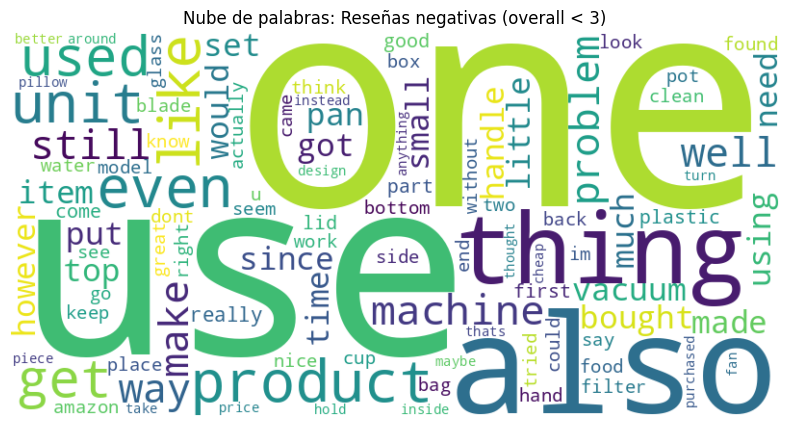

In [157]:
# Filtrar reseñas con overall menor a 3
texto_negativo = ' '.join(df_sample[df_sample['overall'] < 3]['reviewText_preprocesado'])

# Generar nube de reseñas negativas
generar_nube_palabras(texto_negativo, "Nube de palabras: Reseñas negativas (overall < 3)", stop_words=set(stopwords.words('english')))

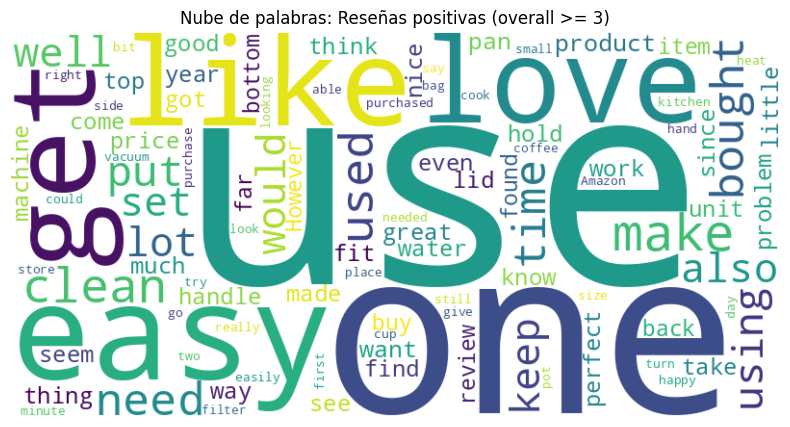

In [158]:
# Filtrar reseñas con overall mayor o igual a 3
texto_positivo = ' '.join(df[df['overall'] >= 3]['reviewText'])

# Generar nube de reseñas positivas
generar_nube_palabras(texto_positivo, "Nube de palabras: Reseñas positivas (overall >= 3)", stop_words=set(stopwords.words('english')))

# 3. Entrenamiento y Testeo de un Modelo de Análisis de Sentimientos

Ahora que se ha verificado el dataset se encuentra listo para proceder al entrenamiento y testeo de los modelos, primero crearemos los dataset de Train y Test para ejecutar los modelos, ademas, realizaremos Cross Validation para tener una respuesta mas robusta de los resultados de mi modelo y utilizaremos Regresion Logistica y Random Forest como los modelos para el entrenamiento y testeo de mi dataset.

In [15]:
from sklearn.model_selection import train_test_split

# Dividir en train y test
X = df_sample['reviewText_preprocesado']  # Texto preprocesado
y = df_sample['overall']  # Etiquetas (número de estrellas)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Ahora explicaremos sobre los hiperparametros:


*   n-gram_range=(1, 2):
Se utilizaron unigramas y bigramas para capturar combinaciones de palabras, lo que ayuda a tratar de comprender mejor las reseñas al modelo
*   max_features=50_000:
Se limitó el número de términos a 50,000 para equilibrar la dimensionalidad del dataset y la capacidad de procesamiento, asegurando que se incluyan los términos más relevantes.  
*   min_df=5:
Se ignoraron los términos que aparecen en menos de 5 reseñas para eliminar palabras raras que podrían introducir ruido en el modelo.
*   max_df=0.7:
Se ignoraron los términos que aparecen en más del 70% de los documentos para eliminar palabras demasiado comunes que no ayudan en el entrenamiento.


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import numpy as np


# Vectorización TF-IDF
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  # Unigramas y bigramas
    max_features=50_000,  # Reducir dimensionalidad
    min_df=5,            # Ignorar términos raros
    max_df=0.7           # Ignorar términos muy comunes
)

# Pipeline para Regresión Logística
pipe_lr = Pipeline([
    ('tfidf', vectorizer),
    ('model', LogisticRegression(class_weight='balanced', random_state=42))
])

# Pipeline para Random Forest
pipe_rf = Pipeline([
    ('tfidf', vectorizer),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100, max_depth=15))
])

# Validación Cruzada para Regresión Logística
print("Validación Cruzada - Regresión Logística:")
cv_scores_lr = cross_val_score(pipe_lr, X_train, y_train, cv=5, scoring='accuracy')
print(f"Puntuaciones de CV: {cv_scores_lr}")
print(f"Precisión media de CV: {np.mean(cv_scores_lr):.4f}")

# Validación Cruzada para Random Forest
print("Validación Cruzada - Random Forest:")
cv_scores_rf = cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Puntuaciones de CV: {cv_scores_rf}")
print(f"Precisión media de CV: {np.mean(cv_scores_rf):.4f}")

# Entrenar y evaluar en el conjunto de test - Regresión Logística
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
print("Evaluación en Test - Regresión Logística:")
print(classification_report(y_test, y_pred_lr))

# Entrenar y evaluar en el conjunto de test - Random Forest
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)
print("Evaluación en Test - Random Forest:")
print(classification_report(y_test, y_pred_rf))

Validación Cruzada - Regresión Logística:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Puntuaciones de CV: [0.61397892 0.62036481 0.62234894 0.62225927 0.6228095 ]
Precisión media de CV: 0.6204
Validación Cruzada - Random Forest:
Puntuaciones de CV: [0.59250367 0.59422102 0.59055289 0.59631513 0.60651938]
Precisión media de CV: 0.5960


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluación en Test - Regresión Logística:
              precision    recall  f1-score   support

           1       0.43      0.60      0.50      4907
           2       0.21      0.34      0.26      4405
           3       0.30      0.43      0.36      8164
           4       0.40      0.46      0.43     19119
           5       0.88      0.73      0.80     63365

    accuracy                           0.63     99960
   macro avg       0.44      0.51      0.47     99960
weighted avg       0.69      0.63      0.65     99960

Evaluación en Test - Random Forest:
              precision    recall  f1-score   support

           1       0.30      0.64      0.41      4907
           2       0.19      0.14      0.16      4405
           3       0.27      0.28      0.28      8164
           4       0.39      0.37      0.38     19119
           5       0.79      0.74      0.77     63365

    accuracy                           0.60     99960
   macro avg       0.39      0.44      0.40     99960

Quisiera comentar los resultados obtenidos previamente cuando trabaje con mi modelo pero con un dataset de 15mil reseñas (trabaje con un dataset pequeño para optimizar mi codigo durante su desarrollo):

 Evaluación en Test - Regresión Logística:

              precision    recall  f1-score   support

           1       0.35      0.47      0.40       184
           2       0.16      0.21      0.18       165
           3       0.22      0.31      0.25       306
           4       0.35      0.39      0.37       717
           5       0.83      0.72      0.78      2376

    accuracy                           0.59      3748


Evaluación en Test - Random Forest:

              precision    recall  f1-score   support

           1       0.31      0.45      0.37       184
           2       0.12      0.07      0.09       165
           3       0.22      0.25      0.23       306
           4       0.33      0.36      0.35       717
           5       0.77      0.73      0.75      2376

    accuracy                           0.58      3748


# Reporte de Métricas y Conclusiones

# Analisis de Resultados:

El modelo alcanza una precision del 63% en Regresion Logistica y de un 60% en Random Forest, sin embargo, se observa que presenta un bajo resultado en el caso de la regresion logística para la distribucion cuando el overal es de 2 estrellas, al analizar el rendimiento por clase, se observa que el mas alto respecto al resto mostrando gran diferencia es con las reseñas de 5 estrellas, lo cual puede deberse a que tiene una mayor cantidad de reseñas dentro del dataset mientras que cuando es de 1 estrella, el F1-Score es aproximadamente la mitad. Por otra parte, analizando los resultados se tiene que el modelo es bueno para diferenciar reseñas positivas, aunque muestra bastante problema al intentar diferencias las reseñas bajas (especialmente en 2 estrellas)

Conclusiones:
El modelo muestra un rendimiento adecuado en la clasificación de reseñas, especialmente en las clases mayoritarias. Sin embargo, el bajo recall para las reseñas de 2 estrellas sugiere que el modelo no es tan efectivo para identificar cuales tienen ese valor. Esto podría deberse a un desbalance en las clases o a la falta de patrones claros en las reseñas. Creo que se deberia tener una mejor distribucion de reseñas con respecto a cada clase. En conclusión, el modelo es viable para su uso, pero necesita ajustes para mejorar su rendimiento en todos los escenarios. O posiblemente se deba utilizar un modelo mas robusto para su análisis.


Al comparar los resultados obtenidos con un conjunto de datos reducido, se observa que el uso de un volumen mayor de datos permite mejorar el rendimiento del modelo. Esto se debe a que, con una mayor cantidad de información, el modelo puede entrenarse de manera más efectiva, lo que se refleja en una ligera pero notable mejora en su precisión (accuracy).